In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [128]:
len(files_20171224)

336

In [126]:
files_20171224[0][-3:]

'zip'

In [127]:
files_20171224 = [f for f in os.listdir("AEMO-datadump/PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_20171224/") if f[-3:] == "zip"]
files_20171224

['PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712262300_20171226230044.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712271300_20171227130121.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712280730_20171228073027.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712242330_20171224233036.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712270930_20171227093033.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712271000_20171227100004.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712300800_20171230080048.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712240700_20171224070104.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712242300_20171224230105.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712251830_20171225183022.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712300730_20171230073116.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712291930_20171229193122.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712260600_20171226060021.zip',
 'PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_201712292330_2017122923302

In [129]:
day_df = pd.DataFrame(index=["NSW1","QLD1","SA1","TAS1","VIC1"])

for file in files_20171224:
#     if file == ".DS_Store":
#         break
    try:
        f1 = "AEMO-datadump/PUBLIC_ACTUAL_OPERATIONAL_DEMAND_HH_20171224/" + file
        df1 = pd.read_csv(f1)
        df1.columns = list(df1.columns)[:4] + list(df1.iloc[0,4:8]) + list(df1.columns[8:])
        df1.drop(index=0, inplace=True)
    except:
        print(file)
# df1
    dem_df1 = pd.DataFrame(data = df1.loc[1:5,"OPERATIONAL_DEMAND"].values, index = df1.loc[1:5,"REGIONID"],columns=[df1.loc[1,"INTERVAL_DATETIME"]])
    day_df = pd.merge(day_df, dem_df1, left_index=True, right_index=True)
    day_df.columns  = pd.to_datetime(day_df.columns)
    day_df = day_df.apply(pd.to_numeric)
    day_df.sort_index(axis=1, inplace=True)
day_df

,2017-12-24 00:00:00,2017-12-24 00:30:00,2017-12-24 01:00:00,2017-12-24 01:30:00,2017-12-24 02:00:00,2017-12-24 02:30:00,2017-12-24 03:00:00,2017-12-24 03:30:00,2017-12-24 04:00:00,2017-12-24 04:30:00,...,2017-12-30 19:00:00,2017-12-30 19:30:00,2017-12-30 20:00:00,2017-12-30 20:30:00,2017-12-30 21:00:00,2017-12-30 21:30:00,2017-12-30 22:00:00,2017-12-30 22:30:00,2017-12-30 23:00:00,2017-12-30 23:30:00
NSW1,7255,7028,6805,6513,6301,6184,6113,6060,6038,6087,...,9298,9103,9012,8833,8556,8370,8126,7936,7661,7383
QLD1,6198,5977,5805,5696,5587,5534,5515,5464,5429,5417,...,8007,8058,8011,7869,7619,7438,7249,7081,6941,6661
SA1,1580,1513,1448,1358,1310,1281,1263,1230,1208,1204,...,1272,1289,1306,1327,1336,1312,1290,1252,1232,1221
TAS1,1070,1075,1066,1066,1060,1063,1063,1061,1060,1065,...,1210,1209,1211,1227,1220,1200,1169,1143,1122,1109
VIC1,4630,4433,4286,4159,4010,3886,3828,3789,3767,3793,...,4419,4404,4416,4474,4433,4370,4310,4236,4205,4385


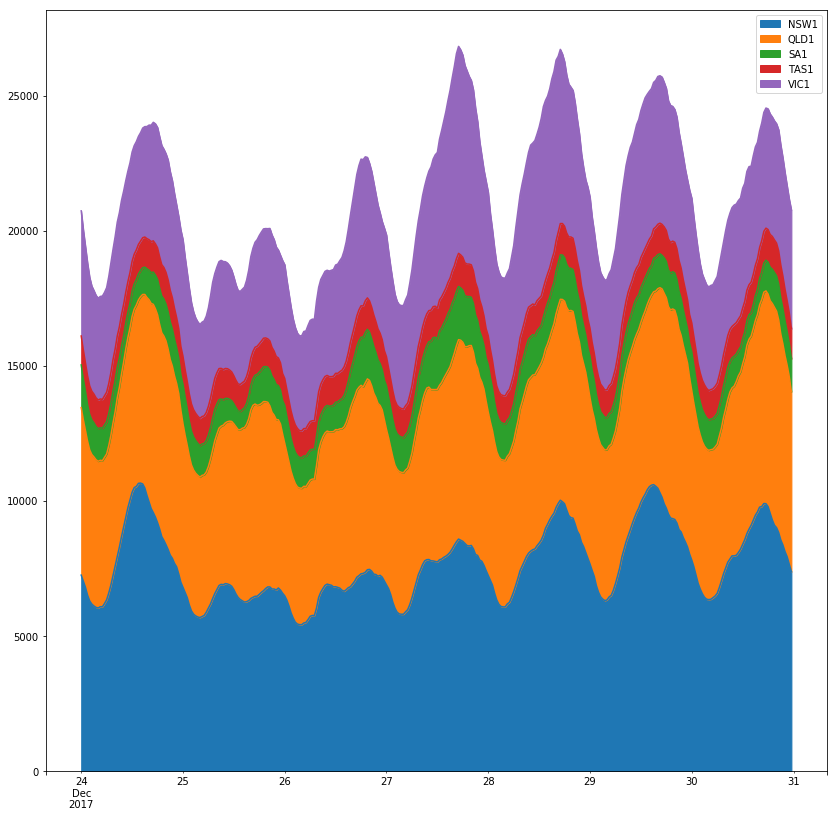

In [130]:
tdf = day_df.T
tdf.plot.area(figsize = (14,14))
plt.show()

In [131]:
tdf.NSW1

2017-12-24 00:00:00     7255
2017-12-24 00:30:00     7028
2017-12-24 01:00:00     6805
2017-12-24 01:30:00     6513
2017-12-24 02:00:00     6301
2017-12-24 02:30:00     6184
2017-12-24 03:00:00     6113
2017-12-24 03:30:00     6060
2017-12-24 04:00:00     6038
2017-12-24 04:30:00     6087
2017-12-24 05:00:00     6084
2017-12-24 05:30:00     6205
2017-12-24 06:00:00     6345
2017-12-24 06:30:00     6595
2017-12-24 07:00:00     6888
2017-12-24 07:30:00     7237
2017-12-24 08:00:00     7582
2017-12-24 08:30:00     7947
2017-12-24 09:00:00     8291
2017-12-24 09:30:00     8677
2017-12-24 10:00:00     9032
2017-12-24 10:30:00     9403
2017-12-24 11:00:00     9746
2017-12-24 11:30:00    10038
2017-12-24 12:00:00    10319
2017-12-24 12:30:00    10492
2017-12-24 13:00:00    10539
2017-12-24 13:30:00    10651
2017-12-24 14:00:00    10660
2017-12-24 14:30:00    10628
                       ...  
2017-12-30 09:00:00     7850
2017-12-30 09:30:00     7968
2017-12-30 10:00:00     7967
2017-12-30 10:

In [132]:
tdf.shape

(336, 5)

(0, 30000)

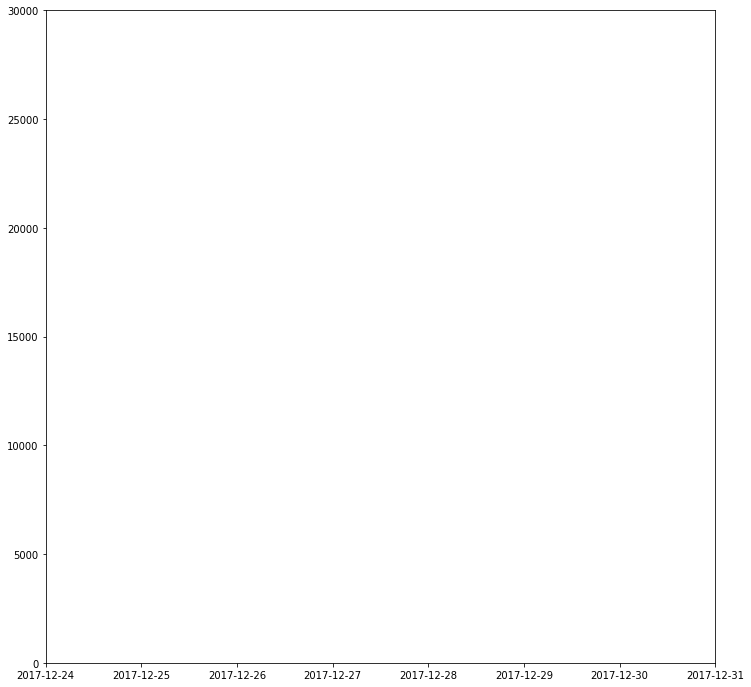

In [136]:
fig1, ax1 = plt.subplots(figsize = (12,12))

# ax1.scatter(x=tdf.index, y=tdf.NSW1)
ax1.plot(x=tdf.NSW1.index, y=tdf.NSW1.values)
ax1.set_xlim(left = pd.to_datetime("2017-12-24 0:00"), right = pd.to_datetime("2017-12-31 0:00"))
ax1.set_ylim(bottom=0, top=30000)

In [149]:
# from scrapy.selector import Selector
# from scrapy.http import HtmlResponse
# import requests
# import re

In [1]:
# Selector(text=ptext).text(".zip")

In [140]:
# parent = requests.get('http://nemweb.com.au/Reports/ARCHIVE/Operational_Demand/ACTUAL_HH/')

In [147]:
# ptext = parent.text

In [2]:
# Selector(text=ptext).re(re.compile("zip"))
# Selector(text=ptext).re("zip")